<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5502/blob/main/Assignment6_VamsiKrishnaBharghavaMuktinutalapati_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import datascience as ds
from datascience import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)




In [ ]:
pip install datascience

In [ ]:
restaurant_data=pd.read_csv('restaurant_inspection_scores.csv')
restaurant_data.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
1,6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
2,6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
3,6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
4,6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection


In [ ]:
restaurant_data=Table.read_table('restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
restaurant_data

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


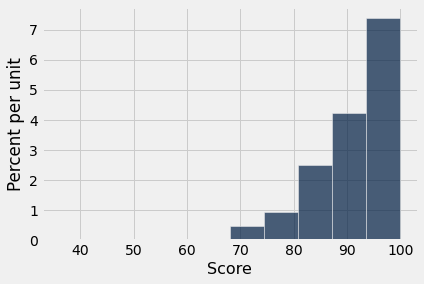

In [ ]:
restaurant_data.hist('Score')

In [ ]:
Population_mean=np.mean(restaurant_data.column('Score'))
Population_mean

91.40706693478886

In [ ]:
restaurant_sample=restaurant_data.sample(100,with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Papa John's Pizza #4151,78750,01/30/2014,100,"6507 JESTER BLVD Bunit 109 AUSTIN, TX 78750 (30.370254, ..."
RZN Enterprises Inc.,78757,06/07/2014,96,"1700 W ANDERSON LN AUSTIN, TX 78757 (30.352648, -97.723624)"
Blue Note Bakery,78745,10/09/2015,100,"4201 S CONGRESS AVE Unit 101 AUSTIN, TX 78745 (30.221101 ..."
Smokey Mo's BBQ,78727,06/23/2016,90,"6001 W PARMER LN Unit 360 AUSTIN, TX 78727 (30.442054, - ..."
St. Gabriel Catholic School,78735,05/21/2014,100,"2500 WIMBERLY LN AUSTIN, TX 78735 (30.291335, -97.873043)"
Starbucks Coffee #6368,78701,10/02/2015,97,"501 W 15TH ST AUSTIN, TX 78701 (30.278185, -97.744242)"
Nordstrom's E- Bar,78746,12/31/2015,93,"2901 S CAPITAL OF TEXAS HWY NB AUSTIN, TX 78746 (30.2546 ..."
Comfort Suites Hotel,78744,08/05/2014,90,"7501 E BEN WHITE BLVD EB AUSTIN, TX 78744 (30.217064, -9 ..."
Subway,78731,01/15/2014,90,"5521 BALCONES DR AUSTIN, TX 78731 (30.336621, -97.757652)"
El Rancho #24 - Bakery,78723,12/30/2014,100,"6800 BERKMAN DR AUSTIN, TX 78723 (30.32023, -97.689045)"


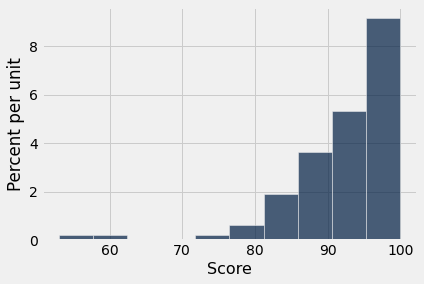

In [ ]:
restaurant_sample.hist('Score')

In [ ]:
sample_mean=np.mean(restaurant_sample.column('Score'))
sample_mean

92.35

Question 1.1
Complete the function one_resampled_mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.

Remember to call your function and check the output before moving on to autograder tests.

In [ ]:
def one_resampled_mean(data):
    sampled_data=data.sample(100)
    resampled_data=sampled_data.sample()
    return(np.mean(resampled_data.column('Score')))

one_resampled_mean(restaurant_data)

91.03

1.2)Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [ ]:

def bootstrap_scores():
    resampled_means = ds.make_array()
    for num in range(5000):
        resampled_mean = np.mean(restaurant_sample.sample().column('Score'))
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means
resampled_means = bootstrap_scores()
print(resampled_means)
print(len(resampled_means))

[91.95 92.54 92.98 ... 91.58 92.97 91.11]
5000


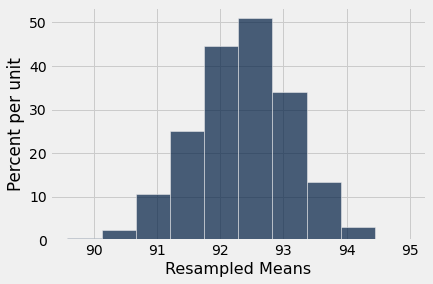

In [ ]:
Table().with_column('Resampled Means', resampled_means).hist()

1.3) Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [ ]:
import scipy.stats as st
#st.norm.interval(alpha=0.95, loc=np.mean(resampled_means), scale=st.sem(resampled_means))
lower_bound =  ds.percentile(2.5, resampled_means)
upper_bound =  ds.percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.77 , 93.79 )


1.6)Without referencing the array resampled_means or performing any new simulations, calculate an interval around the sample_mean that covers approximately 95% of the numbers in the resampled_means array. You may use the following values to compute your result, but you should not perform additional resampling - think about how you can use the CLT to accomplish this.

In [ ]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

sd_of_means = sample_sd / sample_size ** 0.5
lower_bound_normal = sample_mean - 2 * sd_of_means
upper_bound_normal = sample_mean + 2 * sd_of_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 90.80951306399567 , 93.89048693600432 )


2.1)Define the function one_statistic_prop_heads 
which should return exactly one simulated statistic of the proportion of heads from n coin flips.


In [ ]:
def samplecoin_proportions(n, coins_proportions):
    uniform = ds.Table().with_columns(
    "Change", ds.make_array('Heads','Tails'),
    "Chance", coins_proportions)
    return ds.make_array(uniform.sample_from_distribution('Chance', n).column('Chance sample').item(0), uniform.sample_from_distribution('Chance', n).column('Chance sample').item(1))

In [ ]:
#2.1
coin_proportions = make_array(.5, .5) # our coin is fair


def one_statistic_prop_heads(n):
    simulated_proportions = samplecoin_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads

print(one_statistic_prop_heads(15))

5


2.2) Write a function called sample_size_n that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [ ]:
def sample_size_n(n):
    coin_proportions = ds.make_array(.5, .5)
    heads_proportions = ds.make_array()
    for num in np.arange(5000):
        simulated_proportions = samplecoin_proportions(n, coin_proportions)
        prop_heads = simulated_proportions.item(0)
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions

sample_size_n(15)

array([10.,  5., 10., ...,  7.,  9.,  8.])

2.3) Write a function called empirical_sample_mean_sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.

In [ ]:
flights_data=pd.read_csv('united_summer2015.csv')
flights_data

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [ ]:
flightsdata_ds=ds.Table.from_df(flights_data)

In [ ]:
def empirical_sample_mean_sd(n):
    sample_means = ds.make_array()
    for i in np.arange(500):
        sample = flightsdata_ds.sample(n)
        sample_mean = np.mean(sample.column('Delay'))
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.277219659189942

2.4) Now, write a function calledpredictsamplemeansdto find the predicted value of the standard deviation of meansaccording to the relationship between the standard deviation of the sample mean and sample size that is discussedin the textbook.  It takes a sample sizen(a number) as its argument.  It returns the predicted value of the standarddeviation of the mean delay time for samples of sizenfrom the flight delays (represented in the tableunited).

In [ ]:
#2.4
def predict_sample_mean_sd(n):
    flight_delay_std = np.std(df2.column('Delay'))
    return flight_delay_std / (n) ** 0.5

predict_sample_mean_sd(10)

12.484735400972708